# A - Asymmetry
1. Load masks 
2. Find asymmeetry values for all masks

In [104]:
import os

images_folder = 'data/train/images'
masks_folder = 'exp/predicted_masks'
masks_fn = sorted(os.listdir(mask_folder))

In [108]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(images_folder+'/'+masks_fn[16])
p_mask = Image.open(masks_folder+'/'+masks_fn[16])


# plt.imshow(np.array(image)>80, 'gray')
# plt.show()

In [49]:
import numpy as np
img = np.array(image)

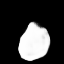

In [80]:
import cv2

def rotate(image, angle):
    """
    Rotates an image (angle in degrees) and expands image to avoid cropping
    """

    height, width = image.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv2.warpAffine(image, rotation_mat, (bound_w, bound_h))
    return rotated_mat

rot_image = rotate(img, 180)

Image.fromarray(rot_image)

In [90]:
def get_center_point(image):
    center = [0,0]
    c_img = image.sum(2)
    count = np.sum(c_img > 0)
    
    for y in range(c_img.shape[0]):
        for x in range(c_img.shape[1]):
            if c_img[y,x] != 0:
                center[1] += x
                center[0] += y

    return (center / count).astype(int)

get_center_point(img)

AxisError: axis 2 is out of bounds for array of dimension 2

In [93]:
image = img
center = [0,0]
c_img = image.sum()

# count = np.sum(c_img > 0)

# for y in range(c_img.shape[0]):
#     for x in range(c_img.shape[1]):
#         if c_img[y,x] != 0:
#             center[1] += x
#             center[0] += y

# (center / count).astype(int)

222271

/home/ivan/tools/anaconda3/envs/dcv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


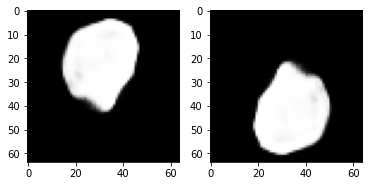

In [87]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(image, 'gray')
ax[1].imshow(rot_image, 'gray')
fig.show()